# Importamos las librerías

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import datetime

# Análisis de la primera planta de generación de energía

In [44]:


data_1= pd.read_csv("../data/datos_Enero.csv")
data_2= pd.read_csv("../data/datos_marzo.csv")
data_3= pd.read_csv("../data/datos_Junio.csv")
data_4= pd.read_csv("../data/datos_Noviembre.csv")
data=pd.concat([data_1, data_2, data_3, data_4], axis=0)

In [46]:
def compute_day(dataframe):
    date=datetime.datetime(year=dataframe["Year"].astype("int"), month=dataframe["Month"].astype("int"), day=dataframe["Day"].astype("int"), hour=dataframe["Hour"].astype("int"))
    return date
data.insert(loc=0, column="Date", value= data.apply(func=compute_day, axis=1))

KeyError: 'Year'

In [47]:
data.columns

Index(['LAT', 'LON', 'YEAR', 'MO', 'DY', 'QV2M', 'RH2M', 'PRECTOTCORR',
       'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'ALLSKY_KT',
       'ALLSKY_SFC_PAR_TOT', 'TS', 'PS', 'ALLSKY_SFC_LW_DWN',
       'CLRSKY_SFC_PAR_TOT', 'ALLSKY_SFC_UVA', 'ALLSKY_SFC_UVB',
       'ALLSKY_SFC_UV_INDEX', 'T2MDEW', 'WS2M'],
      dtype='object')

/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='MO', ylabel='CLRSKY_SFC_SW_DWN'>

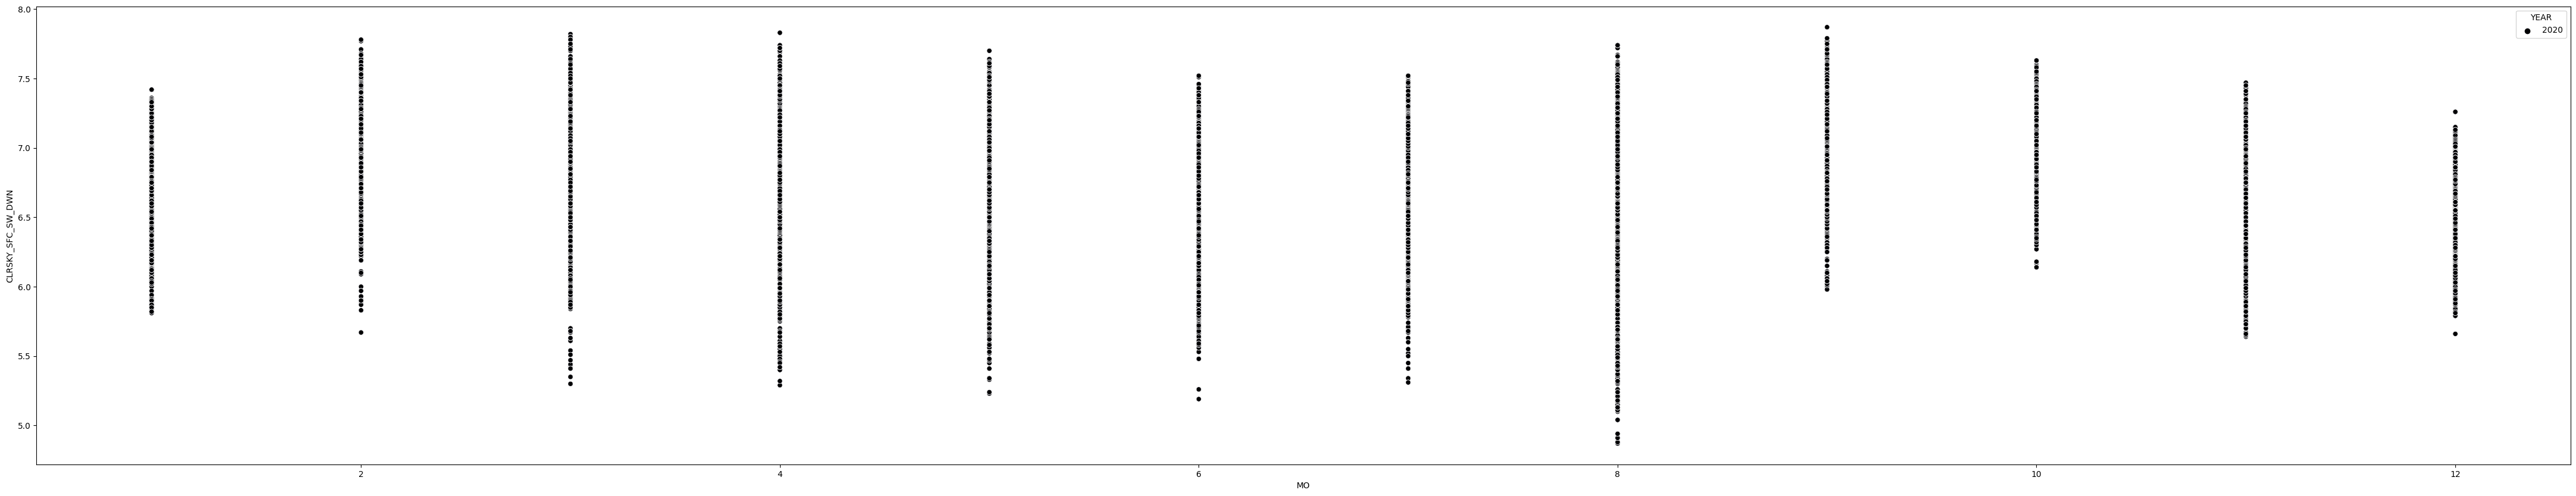

In [48]:
plt.figure(figsize=(55,10))
sns.scatterplot(data, x="MO", y='CLRSKY_SFC_SW_DWN', hue="YEAR", palette="inferno" )

In [52]:
promedio_dia=data.groupby(["MO"])['CLRSKY_SFC_SW_DWN'].mean().reset_index()
# promedio_dia["Fecha"]=pd.to_datetime(promedio_dia[["Year", "Month", "Day"]])
promedio_dia


,MO,CLRSKY_SFC_SW_DWN
0,1,6.723584
1,2,6.951300
2,3,6.843573
3,4,6.845762
4,5,6.743465
5,6,6.579837
6,7,6.642934
7,8,6.729108
8,9,7.098275
9,10,6.976911


/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='MO', ylabel='CLRSKY_SFC_SW_DWN'>

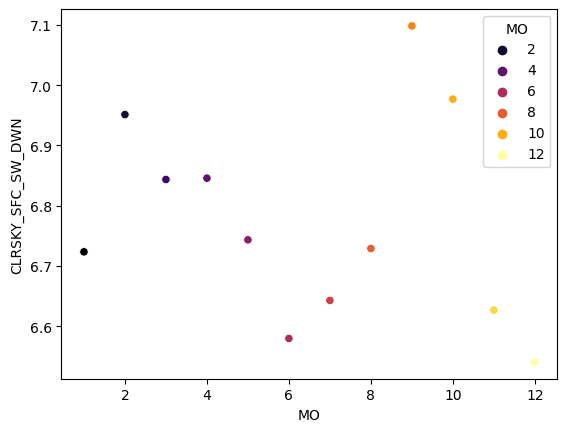

In [54]:
sns.scatterplot(promedio_dia, x="MO", y='CLRSKY_SFC_SW_DWN', hue="MO", palette="inferno")

In [11]:
#data.describe().to_csv("../data/estadistica_raw.csv")

Las columnas de este Dataset son las siguientes:
1. DATE_TIME: Las observaciones se realizan cada 15 minutos
2. DV_POWER: Cantidad de energía DC generada por el inversor en el intervalo de 15 minutos
3. AC_POWER: Cantidad de energía generada por el inversor en el intervalo de 15 minutos
4. DAYLY_YIELD: Suma cumulativa de energía generada en el día hasta el punto en que está siendo registrada

# Análisis exploratorio

En este parte del análisis vamos a realizar una comparación de las variables más imnportantes del proceso

In [55]:
data.columns

Index(['LAT', 'LON', 'YEAR', 'MO', 'DY', 'QV2M', 'RH2M', 'PRECTOTCORR',
       'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'ALLSKY_KT',
       'ALLSKY_SFC_PAR_TOT', 'TS', 'PS', 'ALLSKY_SFC_LW_DWN',
       'CLRSKY_SFC_PAR_TOT', 'ALLSKY_SFC_UVA', 'ALLSKY_SFC_UVB',
       'ALLSKY_SFC_UV_INDEX', 'T2MDEW', 'WS2M'],
      dtype='object')

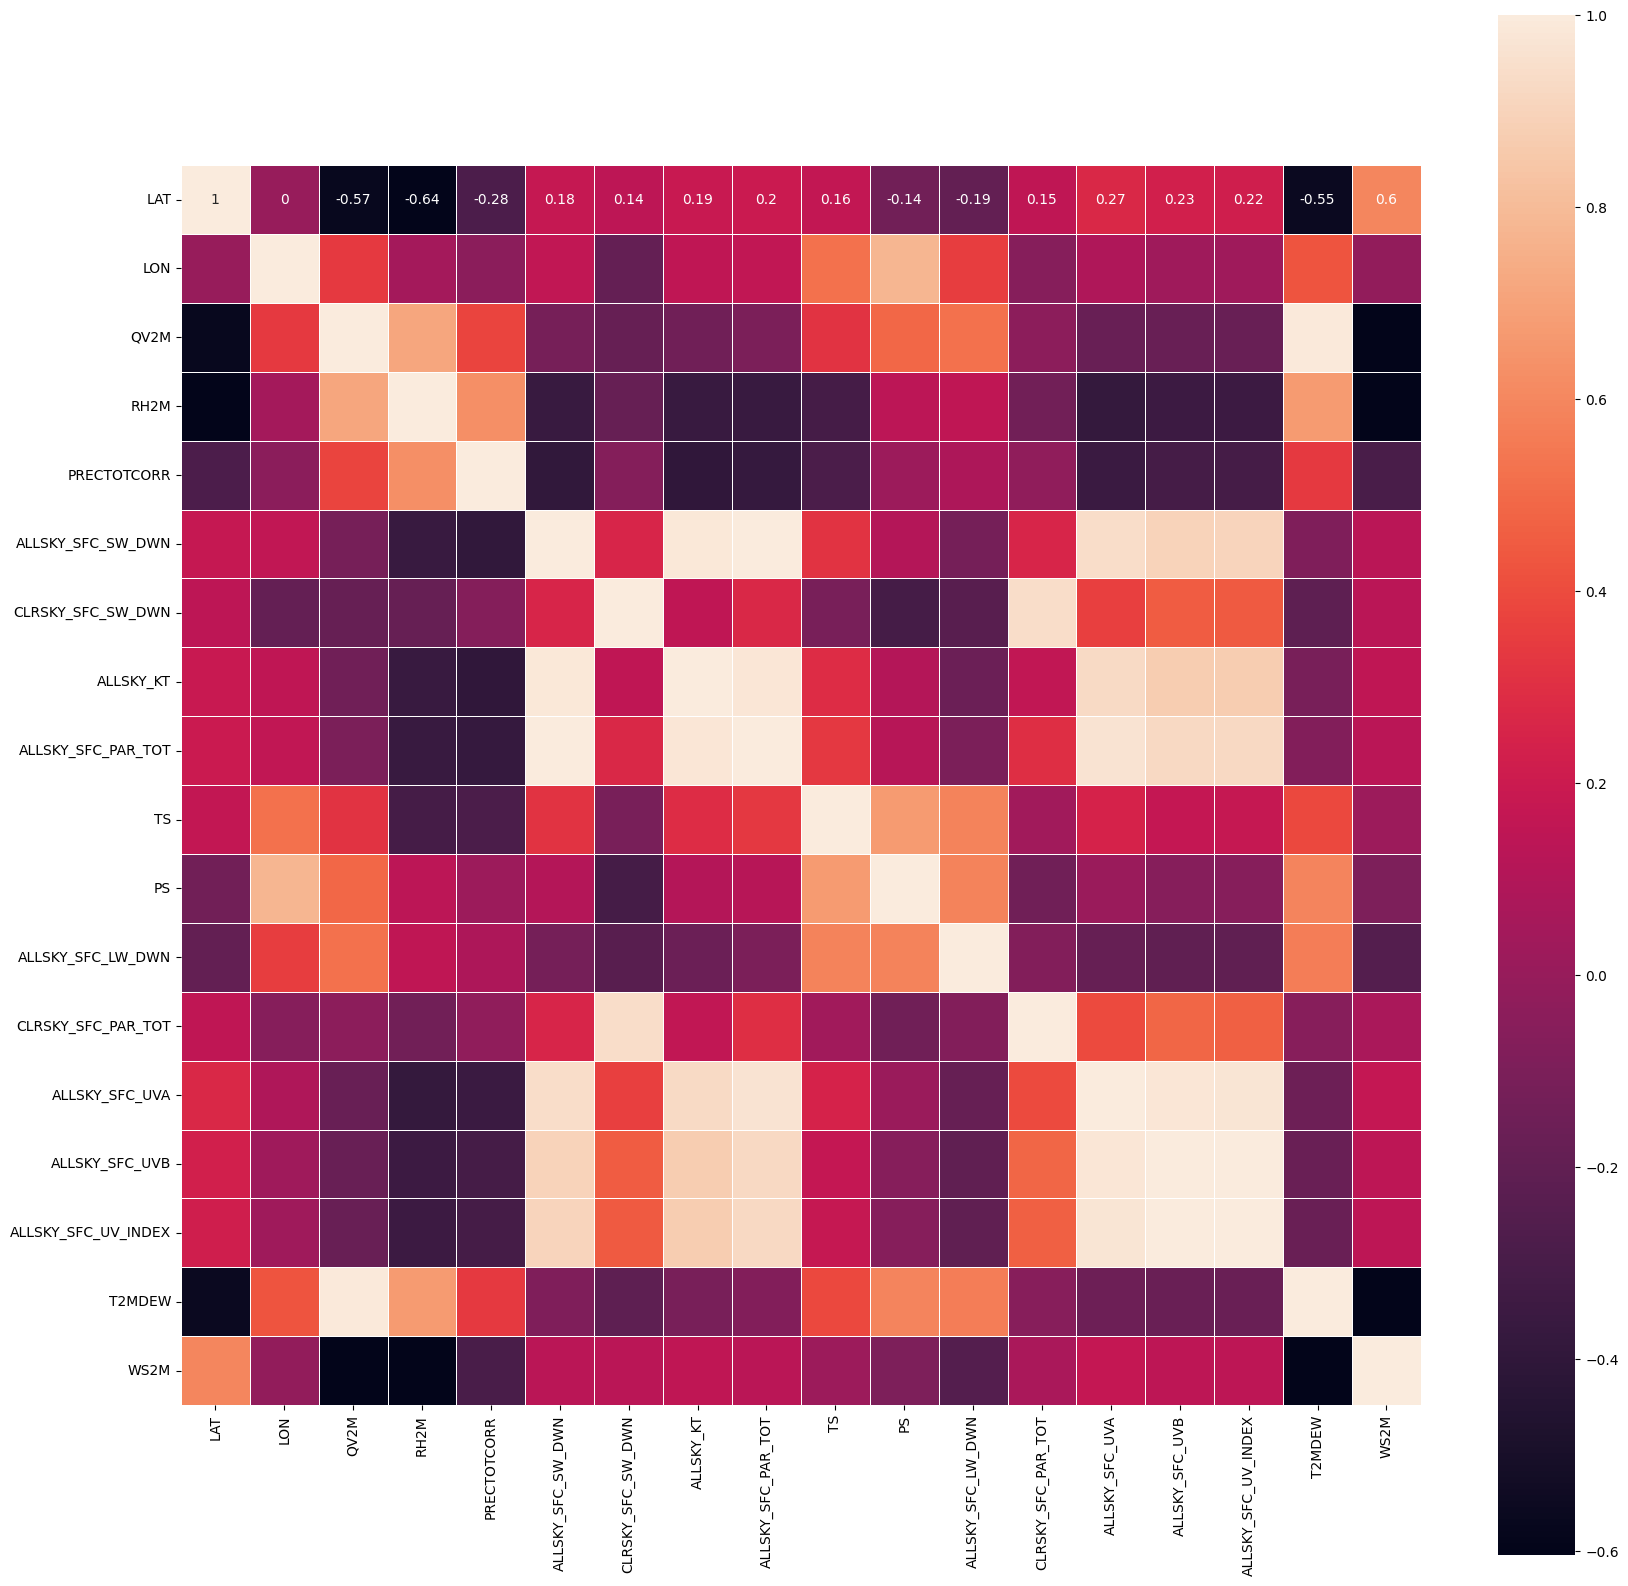

In [58]:
corr = data.drop(columns=['YEAR', 'MO', 'DY']).corr(method = 'spearman')
plt.figure(figsize=(20, 20))
sns.heatmap(corr, robust=True, annot=True, linewidths=.5, square=True)
plt.show()


In [59]:
corr.corr()

,LAT,LON,QV2M,RH2M,PRECTOTCORR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_PAR_TOT,TS,PS,ALLSKY_SFC_LW_DWN,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,T2MDEW,WS2M
LAT,1.000000,-0.308899,-0.929753,-0.932200,-0.743170,0.513361,0.452447,0.518762,0.516626,0.041293,-0.485398,-0.606726,0.387617,0.571975,0.555137,0.550907,-0.909658,0.935227
LON,-0.308899,1.000000,0.515806,0.223899,0.024856,-0.176926,-0.672961,-0.154757,-0.179648,0.748294,0.939546,0.695586,-0.593568,-0.280704,-0.350958,-0.345868,0.581517,-0.308487
QV2M,-0.929753,0.515806,1.000000,0.897980,0.696388,-0.592715,-0.618414,-0.592461,-0.592767,0.215443,0.689104,0.799052,-0.526874,-0.664093,-0.669691,-0.665263,0.996523,-0.938533
RH2M,-0.932200,0.223899,0.897980,1.000000,0.903431,-0.724388,-0.500940,-0.723019,-0.727523,-0.220318,0.394685,0.555999,-0.455593,-0.757104,-0.734433,-0.732266,0.867225,-0.899688
PRECTOTCORR,-0.743170,0.024856,0.696388,0.903431,1.000000,-0.829381,-0.397911,-0.828628,-0.830926,-0.416388,0.188084,0.403971,-0.379551,-0.823234,-0.787552,-0.787855,0.656043,-0.703737
ALLSKY_SFC_SW_DWN,0.513361,-0.176926,-0.592715,-0.724388,-0.829381,1.000000,0.474369,0.997614,0.999662,0.191300,-0.320120,-0.562650,0.449517,0.989776,0.973364,0.975145,-0.574427,0.458854
CLRSKY_SFC_SW_DWN,0.452447,-0.672961,-0.618414,-0.500940,-0.397911,0.474369,1.000000,0.424509,0.483991,-0.408519,-0.780842,-0.715575,0.986837,0.575291,0.645649,0.639533,-0.654376,0.423230
ALLSKY_KT,0.518762,-0.154757,-0.592461,-0.723019,-0.828628,0.997614,0.424509,1.000000,0.996185,0.200199,-0.299173,-0.558250,0.394301,0.982791,0.961282,0.963363,-0.571987,0.467440
ALLSKY_SFC_PAR_TOT,0.516626,-0.179648,-0.592767,-0.727523,-0.830926,0.999662,0.483991,0.996185,1.000000,0.196076,-0.321832,-0.558539,0.462063,0.991309,0.975841,0.977506,-0.574666,0.457252
TS,0.041293,0.748294,0.215443,-0.220318,-0.416388,0.191300,-0.408519,0.200199,0.196076,1.000000,0.748679,0.598473,-0.316957,0.098629,0.022389,0.027459,0.286201,-0.034890


In [29]:
corr.to_excel("correlacion.xlsx")

En el mapa de correlaciones se puede obervar que existe una alta correlación entre el únto de rocío y ka temperatura del ambiente. Al igual que hay una correlación entre el altímetro y la presión 

Análisis entre la hora del día y la generación de energía

In [23]:
data.columns

Index(['Date', 'Year', 'Month', 'Day', 'Hour', 'Power(MW)', 'Minute',
       'Temperature', 'Clearsky GHI', 'DHI', 'Clearsky DHI', 'Clearsky DNI',
       'Cloud Type', 'DNI', 'Relative Humidity', 'Pressure', 'Wind Speed',
       'Global Horizontal UV Irradiance (295-385nm)',
       'Global Horizontal UV Irradiance (280-400nm)', 'Solar Zenith Angle',
       'Dew Point', 'Surface Albedo'],
      dtype='object')

In [24]:
data.corr()

,Date,Year,Month,Day,Hour,Power(MW),Minute,Temperature,Clearsky GHI,DHI,...,Cloud Type,DNI,Relative Humidity,Pressure,Wind Speed,Global Horizontal UV Irradiance (295-385nm),Global Horizontal UV Irradiance (280-400nm),Solar Zenith Angle,Dew Point,Surface Albedo
Date,1.000000,NaN,9.965005e-01,9.513066e-02,2.737347e-03,-0.036721,NaN,0.075031,0.012016,0.022655,...,-0.004654,-0.009261,-0.159247,-0.003570,0.158491,0.010454,0.010415,-0.025591,-0.115197,-8.334803e-02
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,0.996501,NaN,1.000000e+00,1.189318e-02,2.566894e-15,-0.036952,NaN,0.066586,0.010558,0.021696,...,-0.001507,-0.012078,-0.155063,-0.001617,0.161097,0.007689,0.007648,-0.023374,-0.118257,-1.024633e-01
Day,0.095131,NaN,1.189318e-02,1.000000e+00,1.665158e-16,0.002364,NaN,0.068144,-0.001369,-0.009125,...,-0.060467,0.029262,-0.052694,0.009002,-0.025108,0.019158,0.019188,0.000769,0.002724,2.338193e-01
Hour,0.002737,NaN,2.566894e-15,1.665158e-16,1.000000e+00,0.015048,NaN,0.500954,0.370031,0.305025,...,-0.030171,0.313966,-0.391509,-0.080911,-0.012596,0.327934,0.328603,-0.586024,0.033921,-1.916092e-16
Power(MW),-0.036721,NaN,-3.695164e-02,2.364383e-03,1.504825e-02,1.000000,NaN,0.179514,0.482004,0.349817,...,-0.115486,0.426221,-0.199207,0.236971,0.450838,0.453495,0.454109,-0.551039,-0.041324,-1.040191e-03
Minute,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.075031,NaN,6.658551e-02,6.814433e-02,5.009542e-01,0.179514,NaN,1.000000,0.755476,0.576419,...,0.085397,0.585229,-0.535575,-0.331685,0.132072,0.727537,0.727912,-0.749497,0.265030,-1.001697e-01
Clearsky GHI,0.012016,NaN,1.055844e-02,-1.368984e-03,3.700310e-01,0.482004,NaN,0.755476,1.000000,0.810509,...,-0.049049,0.669229,-0.563206,-0.066045,0.394786,0.933067,0.933044,-0.895427,0.060107,-3.593854e-02
DHI,0.022655,NaN,2.169600e-02,-9.124835e-03,3.050250e-01,0.349817,NaN,0.576419,0.810509,1.000000,...,0.203877,0.245930,-0.315944,-0.175751,0.288080,0.662902,0.662611,-0.732673,0.212793,-1.112580e-01


In [43]:
promedio_generacion_hora=data.groupby(["Hour"])["Power(MW)"].mean().reset_index()

/tmp/ipykernel_650/3976693828.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data, x="Hour", y="Power(MW)", palette="inferno", label="Medidas durante un año")


Text(0.5, 0, 'Hora del día')

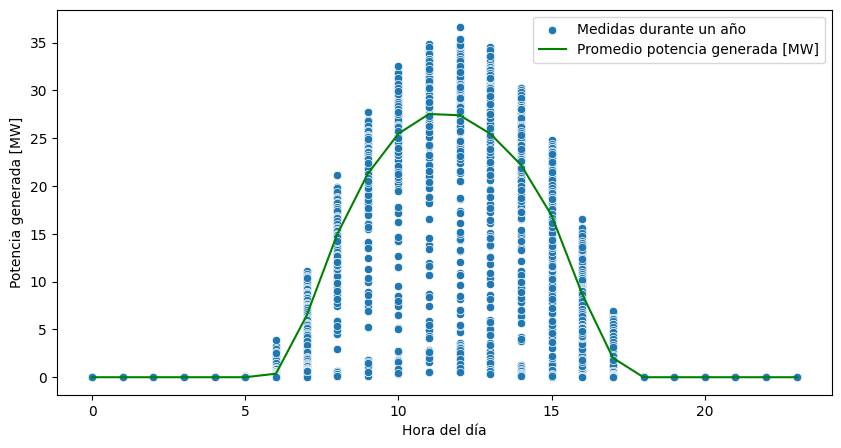

In [63]:
plt.figure(figsize=(10,5))
promedio_generacion_hora=data.groupby(["Hour"])["Power(MW)"].mean().reset_index()
sns.scatterplot(data, x="Hour", y="Power(MW)", palette="inferno", label="Medidas durante un año")
sns.lineplot(promedio_generacion_hora, x="Hour", y="Power(MW)", color="g", label="Promedio potencia generada [MW]")
plt.ylabel("Potencia generada [MW]")
plt.xlabel("Hora del día")

In [8]:
data

,Year,Month,Day,Hour,Power(MW),Minute,Temperature,Clearsky GHI,DHI,Clearsky DHI,...,Cloud Type,DNI,Relative Humidity,Pressure,Wind Speed,Global Horizontal UV Irradiance (295-385nm),Global Horizontal UV Irradiance (280-400nm),Solar Zenith Angle,Dew Point,Surface Albedo
0,2006,1,1,0,0.0,30,20.5,0,0,0,...,7,0,95.57,936,1.7,0.0000,0.0000,120.97,19.8,0.18
1,2006,1,1,1,0.0,30,20.2,0,0,0,...,6,0,96.03,935,1.9,0.0000,0.0000,130.11,19.5,0.18
2,2006,1,1,2,0.0,30,19.9,0,0,0,...,6,0,96.84,935,2.2,0.0000,0.0000,136.17,19.4,0.18
3,2006,1,1,3,0.0,30,19.6,0,0,0,...,7,0,97.90,934,2.4,0.0000,0.0000,137.79,19.3,0.18
4,2006,1,1,4,0.0,30,19.4,0,0,0,...,7,0,98.89,934,2.4,0.0000,0.0000,134.49,19.2,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2006,12,31,19,0.0,30,24.4,507,223,93,...,2,346,86.04,935,2.0,17.6351,22.5576,58.18,21.9,0.18
8756,2006,12,31,20,0.0,30,23.5,267,123,72,...,3,260,93.55,935,1.5,7.9844,10.3340,71.69,22.4,0.18
8757,2006,12,31,21,0.0,30,22.6,53,31,31,...,7,245,98.91,935,1.4,0.0000,0.0000,84.85,22.4,0.18
8758,2006,12,31,22,0.0,30,22.2,0,0,0,...,7,0,99.19,935,1.8,0.0000,0.0000,97.82,22.1,0.18


In [20]:
sns.pairplot(data, hue="Month")

/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


# Análisis de la influencia de las condiciones climáticas

Análisis del mes

In [22]:
generacion_temperatura=data.groupby(["Hour", "Month", "Visibility", "Cloud coverage"])["Solar energy"].mean().reset_index()

KeyError: 'Visibility'

In [ ]:
generacion_temperatura

,Hour,Month,Visibility,Cloud coverage,Solar energy
0,1,1,0.33,1.00,0.0
1,1,1,2.27,1.00,0.0
2,1,1,2.58,1.00,0.0
3,1,1,2.98,1.00,0.0
4,1,1,3.04,0.00,0.0
...,...,...,...,...,...
7461,24,12,10.00,0.00,0.0
7462,24,12,10.00,0.11,0.0
7463,24,12,10.00,0.44,0.0
7464,24,12,10.00,0.67,0.0


/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Hour', ylabel='Solar energy'>

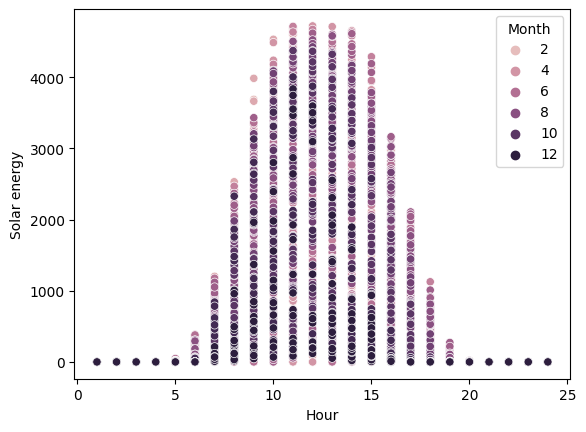

In [12]:
sns.scatterplot(generacion_temperatura, x="Hour", y= "Solar energy", hue="Month")

Al realizar un análsis de la influencia de la temperatura con la generación de energía no se nota una dependencia muy fuerte entre estas dos

/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Temperature', ylabel='Solar energy'>

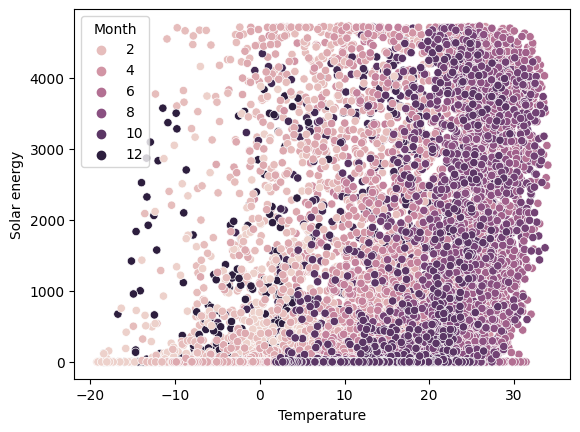

In [13]:
sns.scatterplot(data, y="Solar energy", x= "Temperature", hue="Month")

# Entrenamiento del modelo

In [25]:
data.drop(labels=["Year", "Month", "Hour", "Day"], axis=1, inplace=True)
data.set_index("Date", inplace=True)

In [30]:
data_train, data_test= train_test_split(data, test_size=0.2, shuffle=False)

In [31]:
data_train

,Power(MW),Minute,Temperature,Clearsky GHI,DHI,Clearsky DHI,Clearsky DNI,Cloud Type,DNI,Relative Humidity,Pressure,Wind Speed,Global Horizontal UV Irradiance (295-385nm),Global Horizontal UV Irradiance (280-400nm),Solar Zenith Angle,Dew Point,Surface Albedo
Date,,,,,,,,,,,,,,,,,
2006-01-01 00:00:00,0.0,30,20.5,0,0,0,0,7,0,95.57,936,1.7,0.0000,0.0000,120.97,19.8,0.18
2006-01-01 01:00:00,0.0,30,20.2,0,0,0,0,6,0,96.03,935,1.9,0.0000,0.0000,130.11,19.5,0.18
2006-01-01 02:00:00,0.0,30,19.9,0,0,0,0,6,0,96.84,935,2.2,0.0000,0.0000,136.17,19.4,0.18
2006-01-01 03:00:00,0.0,30,19.6,0,0,0,0,7,0,97.90,934,2.4,0.0000,0.0000,137.79,19.3,0.18
2006-01-01 04:00:00,0.0,30,19.4,0,0,0,0,7,0,98.89,934,2.4,0.0000,0.0000,134.49,19.2,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-10-19 19:00:00,0.0,30,25.9,365,7,85,670,9,0,74.17,932,2.6,0.2899,0.3725,65.30,20.9,0.16
2006-10-19 20:00:00,0.0,30,24.5,127,35,51,415,9,0,83.85,932,1.8,1.2723,1.6683,79.37,21.6,0.16
2006-10-19 21:00:00,0.0,30,23.3,0,0,0,0,6,0,92.22,933,1.5,0.0000,0.0000,93.42,22.0,0.16


In [34]:
scaler=StandardScaler()
data_train.iloc[:,:]= scaler.fit_transform(data_train)
data_test.iloc[:,:] = scaler.fit_transform(data_test)

In [56]:
def transform_sequence_from_dataframe(dataset, window_size, target_variable, print_df=False):
    ds=pd.DataFrame(index=range(len(dataset)))
    for cols in dataset.columns.values:
        print(cols)
        for i in range(window_size):
            ds[r"{}+(t+{})".format(cols, i+1)]=dataset[cols].shift(-i).values
    ds[r"{}(t+{})".format(target_variable, i+1)]=dataset[target_variable].shift(-i-1).values
    if print_df:
        print(ds.head())
    ds.dropna(inplace=True)
    X=ds.iloc[:,:-1].to_numpy().reshape((-1, window_size, len(dataset.columns)))
    Y=ds.iloc[:,-1].to_numpy().reshape((-1,1))
    return X, Y

In [60]:
x_train, y_train=transform_sequence_from_dataframe(data_train, 10,"Temperature", print_df=True)

Power(MW)
Minute
Temperature
Clearsky GHI
DHI
Clearsky DHI
Clearsky DNI
Cloud Type
DNI
Relative Humidity
Pressure
Wind Speed
Global Horizontal UV Irradiance (295-385nm)
Global Horizontal UV Irradiance (280-400nm)
Solar Zenith Angle
Dew Point
Surface Albedo
   Power(MW)+(t+1)  Power(MW)+(t+2)  Power(MW)+(t+3)  Power(MW)+(t+4)  \
0        -0.739803        -0.739803        -0.739803        -0.739803   
1        -0.739803        -0.739803        -0.739803        -0.739803   
2        -0.739803        -0.739803        -0.739803        -0.739803   
3        -0.739803        -0.739803        -0.739803        -0.739803   
4        -0.739803        -0.739803        -0.739803        -0.739803   

   Power(MW)+(t+5)  Power(MW)+(t+6)  Power(MW)+(t+7)  Power(MW)+(t+8)  \
0        -0.739803        -0.739803        -0.739803        -0.739803   
1        -0.739803        -0.739803        -0.739803        -0.346819   
2        -0.739803        -0.739803        -0.346819        -0.722337   
3        -0.

/tmp/ipykernel_14579/1496463295.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ds[r"{}+(t+{})".format(cols, i+1)]=dataset[cols].shift(-i).values
/tmp/ipykernel_14579/1496463295.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ds[r"{}+(t+{})".format(cols, i+1)]=dataset[cols].shift(-i).values
/tmp/ipykernel_14579/1496463295.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

In [63]:
print(y_train)

[[-0.25335726]
 [-0.06566714]
 [ 0.14287744]
 ...
 [ 0.16373189]
 [ 0.03860515]
 [-0.00310377]]
